<a href="https://colab.research.google.com/github/missjaanii/Train-Dataset-Logistic-Regression/blob/master/logisticregressiontrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is used for continuous spectrum. (y=mx+c)

Logistic Regressions has some restrictions which is used for non-continuous spectrum. 




hourStudyStatus

3                 Y                  P

4                 N                  P

5                 N                  F

6                 Y                  F

7                 N                  P



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files 
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
train = pd.read_csv('train.csv')

In [0]:
#let's check the status of train.csv

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
#exploratory data analysis
#EDA



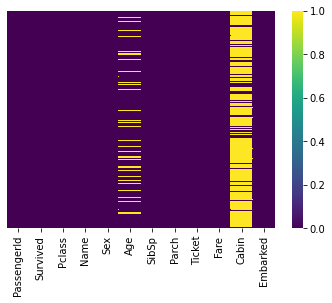

In [7]:
#before proceeding we always have to check the missing data through this method. 
#missing data
#cmap= coolwarm, viridis.... no. of color mapping options available

sns.heatmap(train.isnull(), yticklabels=False,cmap='viridis')

In [0]:
#roughly 25% to 30% data missing from the dataset

In [0]:
# a big challenge so how to work with this

To resolve the missing values approach - In this case Age and cabin two columns are containing missing vakues. The portion of age missing is likely small but for reasonable replacement with some form of imputation is required.

Just recall our sunsports data from SILSO

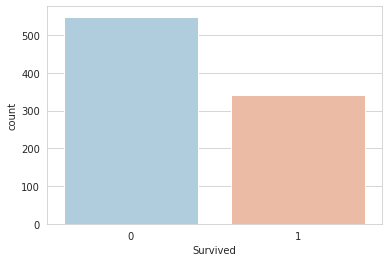

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

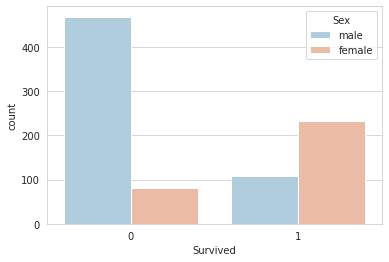

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

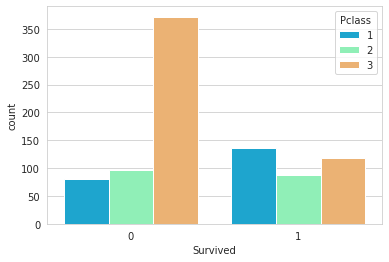

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train, palette='rainbow')

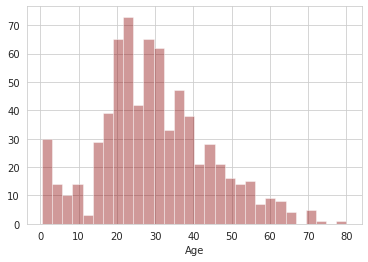

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred',bins=30) #dropna is needed to drop nan values 

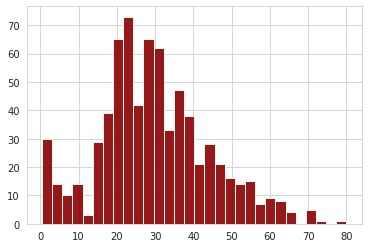

In [14]:
train['Age'].hist(bins=30, color='darkred',alpha=0.9)

In [15]:
#similar to matplotlib, seaborn, bokeh - Cufflinks for plot

!pip install Cufflinks

In [16]:
#how to import cufflinks
import cufflinks as cf
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist', bins=30, color='green')  #try using jupyter  by conda install cufflinks

DATA CLEANING 

We want to fill in  missing age data instead of just dropping the data rows, one way to resolve the problem is by filling in the mean age of all the passengers called imputations. As a data scientist I just have a solution that is to fill it with the mean values.

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37 

    elif Pclass == 2:
      return 30 

    else: 
      return 25

  else:
    return Age


In [0]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

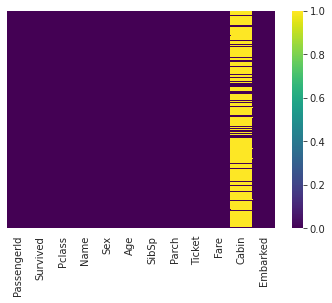

In [20]:
sns.heatmap(train.isnull(), yticklabels=False,cmap='viridis')

In [0]:
#drop columns of embarked that is nan

train.drop('Cabin', axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train.dropna(inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [0]:
# Dummy variable concept

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [0]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)


In [0]:
train = pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
#Now implement logistic regressions

from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'],test_size=0.32, random_state=101) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
#evaluation model

from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       171
           1       0.84      0.61      0.71       114

    accuracy                           0.80       285
   macro avg       0.81      0.77      0.78       285
weighted avg       0.81      0.80      0.79       285

